## Contenido
1.1. Problema de calidad de los datos.

1.2. Conversiones de datos.

1.3. Filtrado de datos.

1.4. Selección de variables.

## Introducción

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/ML_flow1.png)
Fuente de la imagen: medium.com

## ¿Qué es y por qué es importante el pre-procesamiento?

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/kdd.png)
Flujo de KDD (Knowledge Discovery in Databases).

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/kdd2.png)
Fuente: Han, J., & Kamber, M. (2006). 

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/preprocessing.png)
Fuente de la imagen: Herrera, F. (2016). Big Data: Preprocesamiento y calidad de datos. novática, 237, 17.

![](https://raw.githubusercontent.com/igomezv/CienciaDatosIntermedio/main/img/pastel.png)
Fuente de la imagen: xeridia.com




## ¿Qué problemas pueden tener los datos?

- Datos nulos
- Formatos del archivo, ¿cómo leerlos?
- Tipo de datos incorrectos.

-------

# Problemas en los datos

---------

In [1]:
import numpy as np

In [2]:
lista = [[1,2],[3,4],[5, "na"]]

In [3]:
larray = np.array(lista)

In [4]:
larray * 5

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U21'), dtype('int64')) -> None

#### ¿Por qué nos marca error?

In [5]:
larray, np.shape(larray), type(larray)

(array([['1', '2'],
        ['3', '4'],
        ['5', 'na']], dtype='<U21'),
 (3, 2),
 numpy.ndarray)

#### Investigar dtype=U en https://numpy.org/doc/stable/reference/arrays.dtypes.html 

In [6]:
larray = np.array(lista, dtype=float)

ValueError: could not convert string to float: 'na'

In [7]:
lista[2][1]

'na'

In [8]:
lista[2][1] = np.nan

In [9]:
lista

[[1, 2], [3, 4], [5, nan]]

In [10]:
larray = np.array(lista)

In [11]:
larray, np.shape(larray), type(larray)

(array([[ 1.,  2.],
        [ 3.,  4.],
        [ 5., nan]]),
 (3, 2),
 numpy.ndarray)

In [12]:
larray * 5

array([[ 5., 10.],
       [15., 20.],
       [25., nan]])

 ### Quitar valores nulos con sklearn.preprocessing https://scikit-learn.org/stable/modules/impute.html#impute

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [15]:
imp.fit(larray)

SimpleImputer()

In [16]:
imp.transform(larray)

array([[1., 2.],
       [3., 4.],
       [5., 3.]])

##### Repetir y probar con diferentes estrategias
#### Leer y quitar valores nulos con pandas

In [17]:
import pandas as pd

In [18]:
df = pd.DataFrame(lista)

In [19]:
#repasando dataframes de pandas 
# https://www.analyticslane.com/2019/06/21/seleccionar-filas-y-columnas-en-pandas-con-iloc-y-loc/
print(df.iloc[:, 0]) # Primera columna
print(df.iloc[:, 1]) # Segunda columna
df.iloc[:, -1] # Última columna

0    1
1    3
2    5
Name: 0, dtype: int64
0    2.0
1    4.0
2    NaN
Name: 1, dtype: float64


0    2.0
1    4.0
2    NaN
Name: 1, dtype: float64

In [20]:
df.iloc[2]

0    5.0
1    NaN
Name: 2, dtype: float64

In [21]:
df[1]

0    2.0
1    4.0
2    NaN
Name: 1, dtype: float64

In [22]:
df2 = pd.to_numeric(df[1], errors ='coerce')
df2

0    2.0
1    4.0
2    NaN
Name: 1, dtype: float64

In [23]:
df3=df2.dropna(how='all')
df3

0    2.0
1    4.0
Name: 1, dtype: float64

In [24]:
df3=df2.dropna(how='any')
df3

0    2.0
1    4.0
Name: 1, dtype: float64

In [25]:
df2 = pd.to_numeric(df[1], errors ='coerce').fillna(0)#.astype('int')
df2

0    2.0
1    4.0
2    0.0
Name: 1, dtype: float64

In [26]:
df.iloc[:, 1] = df2
df

,0,1
0,1,2.0
1,3,4.0
2,5,0.0


## Cargar un archivo de texto
### Es importante conocer el archivo de texto e inspeccionarlo previamente.

In [27]:
np.loadtxt('datasets/prueba1.csv', skiprows=1, usecols=[4,5,6])

array([[45., 70.,  8.],
       [40., 60.,  7.],
       [44., 55.,  6.],
       [30., 50.,  7.],
       [60., 85.,  9.],
       [55., 65.,  8.],
       [50., 73.,  5.],
       [33., 70.,  8.]])

In [28]:
np.loadtxt('datasets/prueba2.csv', skiprows=1, usecols=[4,5,6]) #, delimiter=',')

IndexError: list index out of range

In [29]:
pd.read_csv('datasets/prueba2.csv')

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45,70,8
1,María,Gómez,Puebla,F,40,60,7
2,Jimena,Rodríguez,Veracruz,F,44,55,6
3,Alfredo,Hernández,México,M,30,50,7
4,Luis,hernandez,México,M,60,85,9
5,Gabriela,perez,Hidalgo,F,55,65,8
6,Enrique,García,Veracruz,M,50,73,5
7,Laura,Zamora,Puebla,F,33,70,8


## Conversión de datos
Referencia: https://www.programiz.com/python-programming/type-conversion-and-casting 

In [30]:
# Ejemplo 1
num_int = 123
num_flo = 1.23

num_new = num_int + num_flo

print("datatype of num_int:",type(num_int))
print("datatype of num_flo:",type(num_flo))

print("Value of num_new:",num_new)
print("datatype of num_new:",type(num_new))

datatype of num_int: <class 'int'>
datatype of num_flo: <class 'float'>
Value of num_new: 124.23
datatype of num_new: <class 'float'>


In [31]:
# Ejemplo 2
num_int = 123
num_str = "456"

print("Data type of num_int:",type(num_int))
print("Data type of num_str:",type(num_str))

print(num_int+num_str)

Data type of num_int: <class 'int'>
Data type of num_str: <class 'str'>


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [32]:
# Ejemplo 3
num_int = 123
num_str = "456"

print("Data type of num_int:",type(num_int))
print("Data type of num_str before Type Casting:",type(num_str))

num_str = int(num_str)
print("Data type of num_str after Type Casting:",type(num_str))

num_sum = num_int + num_str

print("Sum of num_int and num_str:",num_sum)
print("Data type of the sum:",type(num_sum))

Data type of num_int: <class 'int'>
Data type of num_str before Type Casting: <class 'str'>
Data type of num_str after Type Casting: <class 'int'>
Sum of num_int and num_str: 579
Data type of the sum: <class 'int'>


In [38]:
# Ejemplo 4
lista = [10,22,33,44,55]
nparray = np.array(lista)
df = pd.DataFrame(lista)
type(lista), type(nparray), type(df)

(list, numpy.ndarray, pandas.core.frame.DataFrame)

In [39]:
lista2 = list(nparray)
lista2, type(lista2)

([10, 22, 33, 44, 55], list)

In [43]:
lista3 = list(df)
lista3, type(lista3), type(lista3[0])

([0], list, int)

In [41]:
lista4 = list(df.values)
lista4, type(lista4)

([array([10]), array([22]), array([33]), array([44]), array([55])], list)

### Filtrado de datos
https://numpy.org/doc/stable/reference/routines.sort.html

In [44]:
import numpy as np
array = np.arange(1, 29, 3)
array

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28])

In [45]:
array[1]

4

In [46]:
array[2:6]

array([ 7, 10, 13, 16])

In [47]:
array[:5]

array([ 1,  4,  7, 10, 13])

In [79]:
## Matrices
array = np.random.randint(1, 15, (3,3))
array

array([[12, 14,  6],
       [ 9, 11, 11],
       [10,  2, 10]])

In [80]:
array[0, 1]

14

In [81]:
array[1, :]

array([ 9, 11, 11])

In [82]:
# Con condiciones
array[array < 5]

array([2])

In [85]:
# OR
array[(array < 5) | (array > 9)]

array([12, 14, 11, 11, 10,  2, 10])

In [88]:
#filter for values greater than 5 and less than 9
array[(array > 5) & (array < 9)]

array([6])

In [94]:
#filtrar filas to 2, 3, 5
filtro = np.asarray([2,3,5])
mask = np.in1d(array[:, 1], filtro)
array[mask]
# 

array([[10,  2, 10]])

In [84]:
# Condiciones más complejas
array2 = array[np.where(array % 2 == 0)]
array2, np.shape(array2)

(array([12, 14,  6, 10,  2, 10]), (6,))

In [59]:
## Con mascara
condition = np.mod(array, 3)==0
condition

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True]])

In [60]:
np.extract(condition, array)

array([3, 6, 9])

In [61]:
array[condition]

array([3, 6, 9])

In [64]:
arr = np.random.randint(1, 10, (2,3))
arr


array([[9, 6, 1],
       [4, 7, 7]])

In [66]:
np.place(arr, arr>5, [44, 55])
arr

array([[44, 55,  1],
       [44, 55, 44]])

### Filtros de datos con pandas

In [105]:
df = pd.read_csv('datasets/faltantes.csv')
df

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45.0,70.0,8.0
1,María,Gómez,Puebla,F,40.0,60.0,7.0
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0
3,Alfredo,Hernández,México,M,30.0,NaN,NaN
4,Luis,hernandez,México,M,60.0,85.0,9.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN
6,Enrique,García,Veracruz,M,50.0,73.0,5.0
7,Laura,Zamora,Puebla,F,33.0,70.0,8.0


In [106]:
femenino = df['Genero'] == 'F'
femenino.head()

0    False
1     True
2     True
3    False
4    False
Name: Genero, dtype: bool

In [107]:
df_fem = df[femenino]
df_fem.head()

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
1,María,Gómez,Puebla,F,40.0,60.0,7.0
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN
7,Laura,Zamora,Puebla,F,33.0,70.0,8.0


In [108]:
# mas directo
df_fem = df[df['Genero'] == "F"]
df_fem

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
1,María,Gómez,Puebla,F,40.0,60.0,7.0
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN
7,Laura,Zamora,Puebla,F,33.0,70.0,8.0


In [112]:
df_null = df[df.Edad.isnull()] 
df_null.head()
# Probar con horas de sueño

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0


In [113]:
df_notnull = df[df.Edad.notnull()] 
df_notnull.head()

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45.0,70.0,8.0
1,María,Gómez,Puebla,F,40.0,60.0,7.0
3,Alfredo,Hernández,México,M,30.0,NaN,NaN
4,Luis,hernandez,México,M,60.0,85.0,9.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN


In [115]:
# Filtrar por condicion
df_filtered = df[df.Edad.isin([40, 45])]
df_filtered


,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45.0,70.0,8.0
1,María,Gómez,Puebla,F,40.0,60.0,7.0


In [116]:
df_filtered = df[~df.Edad.isin([40, 45])]
df_filtered
        

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
2,Jimena,Rodríguez,Veracruz,F,NaN,55.0,6.0
3,Alfredo,Hernández,México,M,30.0,NaN,NaN
4,Luis,hernandez,México,M,60.0,85.0,9.0
5,Gabriela,perez,Hidalgo,F,55.0,65.0,NaN
6,Enrique,García,Veracruz,M,50.0,73.0,5.0
7,Laura,Zamora,Puebla,F,33.0,70.0,8.0


In [117]:
### union de varias condiciones
df_combined = df[df.Edad.isin([40, 45]) & df.Edad.notnull()]
df_combined

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45.0,70.0,8.0
1,María,Gómez,Puebla,F,40.0,60.0,7.0


## Selección de variables
https://scikit-learn.org/stable/modules/feature_selection.html

In [118]:
df = pd.read_csv('datasets/prueba2.csv')
df

,Nombre,Apellido,Estado,Genero,Edad,Peso,Horas de sueño
0,Juan,Perez,Veracruz,M,45,70,8
1,María,Gómez,Puebla,F,40,60,7
2,Jimena,Rodríguez,Veracruz,F,44,55,6
3,Alfredo,Hernández,México,M,30,50,7
4,Luis,hernandez,México,M,60,85,9
5,Gabriela,perez,Hidalgo,F,55,65,8
6,Enrique,García,Veracruz,M,50,73,5
7,Laura,Zamora,Puebla,F,33,70,8


In [122]:
import seaborn as sns

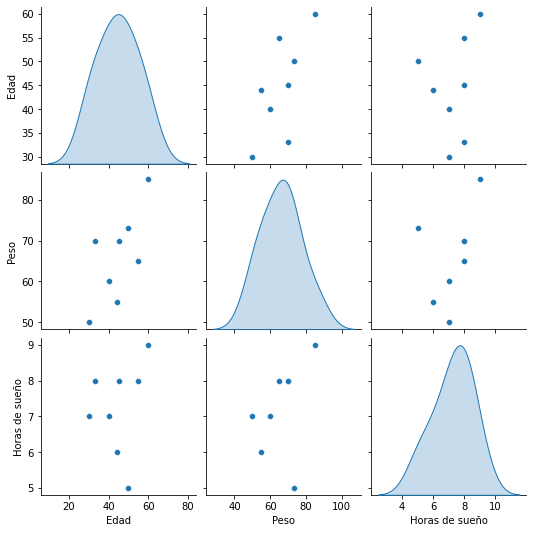

In [123]:
sns.pairplot(df, diag_kind="kde")

In [124]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

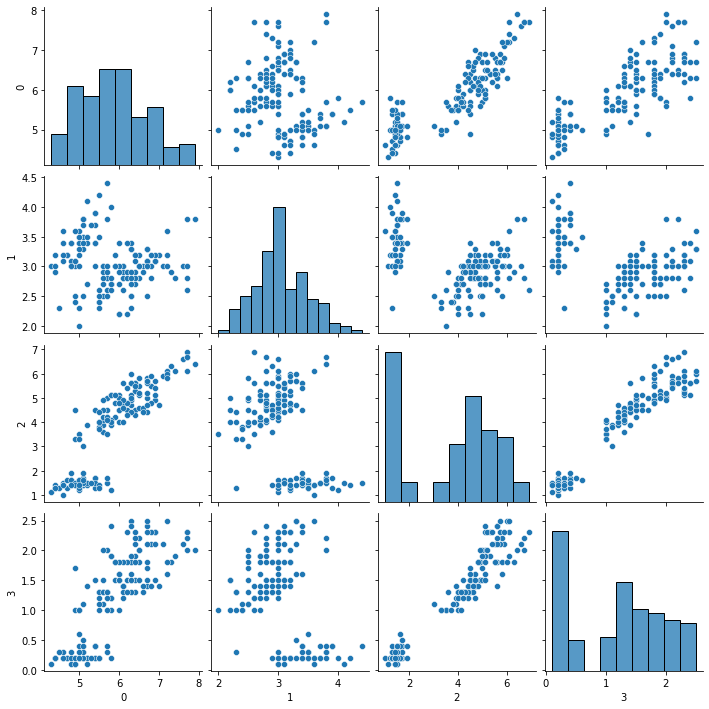

In [128]:
sns.pairplot(pd.DataFrame(X))